# Chicago Crimes Data Prediction

* Data Source : https://data.cityofchicago.org/
* Data Set : https://www.kaggle.com/datasets/chicago/chicago-crime


---

 ### **Business Objective** :  
 
 To Predict the kind of crimes being happend in the state of Chicago frequently so that it will be usefull for the police department to minimise the Crime


 ### **About Dataset** : 
 
 The provided dataset represents reported incidents of crime in the City of Chicago from 2001 to the present, excluding the most recent seven days. The data is sourced from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. To protect the privacy of crime victims, addresses are only indicated at the block level, and specific locations are not disclosed. It's important to note that this dataset includes unverified reports received by the Police Department. The initial classifications of crimes may be subject to change as additional investigations unfold, and there is a possibility of errors, whether mechanical or human. Consequently, the Chicago Police Department does not provide any guarantee, whether expressed or implied, regarding the accuracy, completeness, timeliness, or correct sequence of the information.






**Importing the Libraries**

In [1]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the required libraries and modules
import pandas as pd             # Importing pandas library for data manipulation
import numpy as np              # Importing numpy library for numerical operations
import matplotlib.pyplot as plt # Importing matplotlib library for data visualization
import seaborn as sns           # Importing seaborn library for enhanced data visualization
import missingno as msno        # Importing missingno library for missing data visualization
import datetime as dt           # Importing datetime library for date and time operations
import seaborn as sns           # Importing seaborn library again (duplicate import, not necessary)
from scipy import stats         # Import the 'stats' module from the 'scipy' library for statistical and scientific computations

**Importing the dataset**

In [3]:
# Reading data from a CSV file named "crime_data.csv" into a pandas DataFrame
data = pd.read_csv("crime_data.csv",

# Disabling low_memory mode to prevent automatic datatype inference for large files
                   low_memory=False,

# Using chunksize to read the data in smaller chunks of 100,000 rows at a time (useful for memory management)
                   chunksize=100000)


In [4]:
# Initialize an empty list to store data chunks
li = []

# Iterate over the chunks of data from the 'data' object (which is a generator)
for i in data:
    li.append(i)                       # Append the current data chunk to the 'li' list
    break                              # Exit the loop after processing the first chunk (optional, used here for demonstration)

# Concatenate the list of data chunks into a single pandas DataFrame 'df'
# 'sort=False' is used to prevent sorting of columns in the resulting DataFrame
df = pd.concat(li, sort=False)


In [5]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,-87.670000,"(41.815117282, -87.669999562)",29.0,14924.0,59.0,706.0,3.0,37.0,23.0,108.0
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,-87.765400,"(41.895080471, -87.765400451)",4.0,4299.0,26.0,562.0,45.0,5.0,25.0,67.0
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,-87.716650,"(41.937405765, -87.716649687)",15.0,21538.0,22.0,216.0,12.0,39.0,7.0,168.0
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,-87.755121,"(41.881903443, -87.755121152)",11.0,22216.0,26.0,696.0,23.0,32.0,25.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11223452,JA550814,12/15/2017 05:39:27 PM,073XX S UNIVERSITY AVE,2022,NARCOTICS,POSS: COCAINE,RESIDENCE,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,10215383,HY401570,08/29/2015 02:15:00 AM,0000X W ELM ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,-87.629210,"(41.90316534, -87.629210442)",22.0,14926.0,37.0,230.0,11.0,54.0,14.0,197.0
99997,10215384,HY401563,08/29/2015 02:10:00 AM,012XX W SUNNYSIDE AVE,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False,...,-87.661469,"(41.963517399, -87.661469059)",37.0,22616.0,31.0,611.0,39.0,15.0,5.0,6.0
99998,10215385,HY392317,08/15/2015 12:00:00 AM,010XX W SCHOOL ST,0820,THEFT,$500 AND UNDER,SIDEWALK,False,False,...,-87.654552,"(41.941737079, -87.654552346)",38.0,4449.0,57.0,710.0,25.0,22.0,5.0,28.0


**Exploring the dataset**

In [6]:
# Randomly sample and display 3 rows from the 'df' DataFrame
df.sample(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
43535,10296650,HY484762,11/01/2015 10:49:00 AM,073XX S WOODLAWN AVE,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,...,-87.595746,"(41.761878183, -87.595745949)",32.0,21546.0,67.0,121.0,33.0,61.0,18.0,217.0
4830,10231957,HY419510,09/11/2015 03:00:00 PM,010XX N LARAMIE AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,True,True,...,-87.755701,"(41.899096313, -87.755700717)",4.0,4299.0,26.0,585.0,45.0,5.0,25.0,69.0
13197,10244880,HY433129,09/22/2015 01:17:00 AM,018XX W 18TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,False,False,...,-87.671913,"(41.857711093, -87.671912562)",8.0,14920.0,33.0,366.0,26.0,43.0,15.0,121.0


Below is the detailed information of our Pandas Dataframe

In [7]:
# Display summary information about the 'df' DataFrame, including data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          100000 non-null  int64  
 1   Case Number                 100000 non-null  object 
 2   Date                        100000 non-null  object 
 3   Block                       100000 non-null  object 
 4   IUCR                        100000 non-null  object 
 5   Primary Type                100000 non-null  object 
 6   Description                 100000 non-null  object 
 7   Location Description        99729 non-null   object 
 8   Arrest                      100000 non-null  bool   
 9   Domestic                    100000 non-null  bool   
 10  Beat                        100000 non-null  int64  
 11  District                    100000 non-null  int64  
 12  Ward                        99996 non-null   float64
 13  Community Area 

Below is the information of dataframe contains numerical data, the description contains these information for each column: count - The number of not-empty values, mean, median and standard deviation

In [8]:
# Generate descriptive statistics for the numerical columns in the 'df' DataFrame
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
count,1.000000e+05,100000.000000,100000.000000,99996.000000,99996.000000,9.777700e+04,9.777700e+04,100000.000000,97777.000000,97777.000000,97544.000000,97777.000000,97588.000000,97611.000000,97590.000000,97588.000000,97604.000000,97605.000000
mean,1.028424e+07,1142.530530,11.196520,22.882855,37.362625,1.164599e+06,1.885788e+06,2015.063380,41.842199,-87.671505,27.559307,19116.466337,38.956880,382.639385,25.726048,31.876460,15.033718,149.956877
std,2.706294e+05,693.511392,6.928926,13.907918,21.424580,1.635850e+04,3.113066e+04,0.696784,0.085619,0.059546,15.162710,5697.806133,19.860325,231.566427,14.527373,19.044592,6.424237,78.155301
min,1.744168e+06,111.000000,1.000000,1.000000,1.000000,1.094231e+06,1.813910e+06,2001.000000,41.644604,-87.928909,1.000000,2733.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.019593e+07,612.000000,6.000000,10.000000,23.000000,1.152709e+06,1.858858e+06,2015.000000,41.768105,-87.714676,15.000000,21184.000000,25.000000,176.000000,13.000000,16.000000,10.000000,84.000000
50%,1.024938e+07,1023.000000,10.000000,23.000000,32.000000,1.166249e+06,1.891625e+06,2015.000000,41.858441,-87.665413,28.000000,21560.000000,37.000000,381.000000,26.000000,30.000000,16.000000,152.000000
75%,1.029298e+07,1711.000000,17.000000,34.000000,56.000000,1.176406e+06,1.908601e+06,2015.000000,41.904912,-87.627930,41.000000,22216.000000,57.000000,580.000000,37.000000,52.000000,20.000000,221.000000
max,1.281295e+07,2535.000000,31.000000,50.000000,77.000000,1.205111e+06,1.951507e+06,2022.000000,42.022548,-87.524615,53.000000,26633.000000,77.000000,801.000000,50.000000,61.000000,25.000000,277.000000


below is the code to get the shape of our data set, Rows X Columns

In [9]:
# Retrieve and display the dimensions (number of rows and columns) of the 'df' DataFrame
df.shape

(100000, 30)

To find the unique values for every column

In [10]:
# Count and display the number of unique values in each column of the 'df' DataFrame
df.nunique()

ID                            100000
Case Number                   100000
Date                           45680
Block                          22313
IUCR                             307
Primary Type                      33
Description                      322
Location Description             119
Arrest                             2
Domestic                           2
Beat                             274
District                          23
Ward                              50
Community Area                    77
FBI Code                          25
X Coordinate                   36863
Y Coordinate                   45844
Year                              21
Updated On                       562
Latitude                       64181
Longitude                      64172
Location                       64185
Historical Wards 2003-2015        51
Zip Codes                         77
Community Areas                   77
Census Tracts                    800
Wards                             50
B

**Checking the null values in dataset**

In [11]:
# Calculate and display the total count of missing (NaN) values in the entire 'df' DataFrame
df.isnull().sum().sum()

30487

In [12]:
# Calculate and display the count of missing (NaN) values for each column in the 'df' DataFrame
df.isnull().sum()

ID                               0
Case Number                      0
Date                             0
Block                            0
IUCR                             0
Primary Type                     0
Description                      0
Location Description           271
Arrest                           0
Domestic                         0
Beat                             0
District                         0
Ward                             4
Community Area                   4
FBI Code                         0
X Coordinate                  2223
Y Coordinate                  2223
Year                             0
Updated On                       0
Latitude                      2223
Longitude                     2223
Location                      2223
Historical Wards 2003-2015    2456
Zip Codes                     2223
Community Areas               2412
Census Tracts                 2389
Wards                         2410
Boundaries - ZIP Codes        2412
Police Districts    

**Plotting graph for null values**

Text(0.5, 1.0, 'Missing values in dataset')

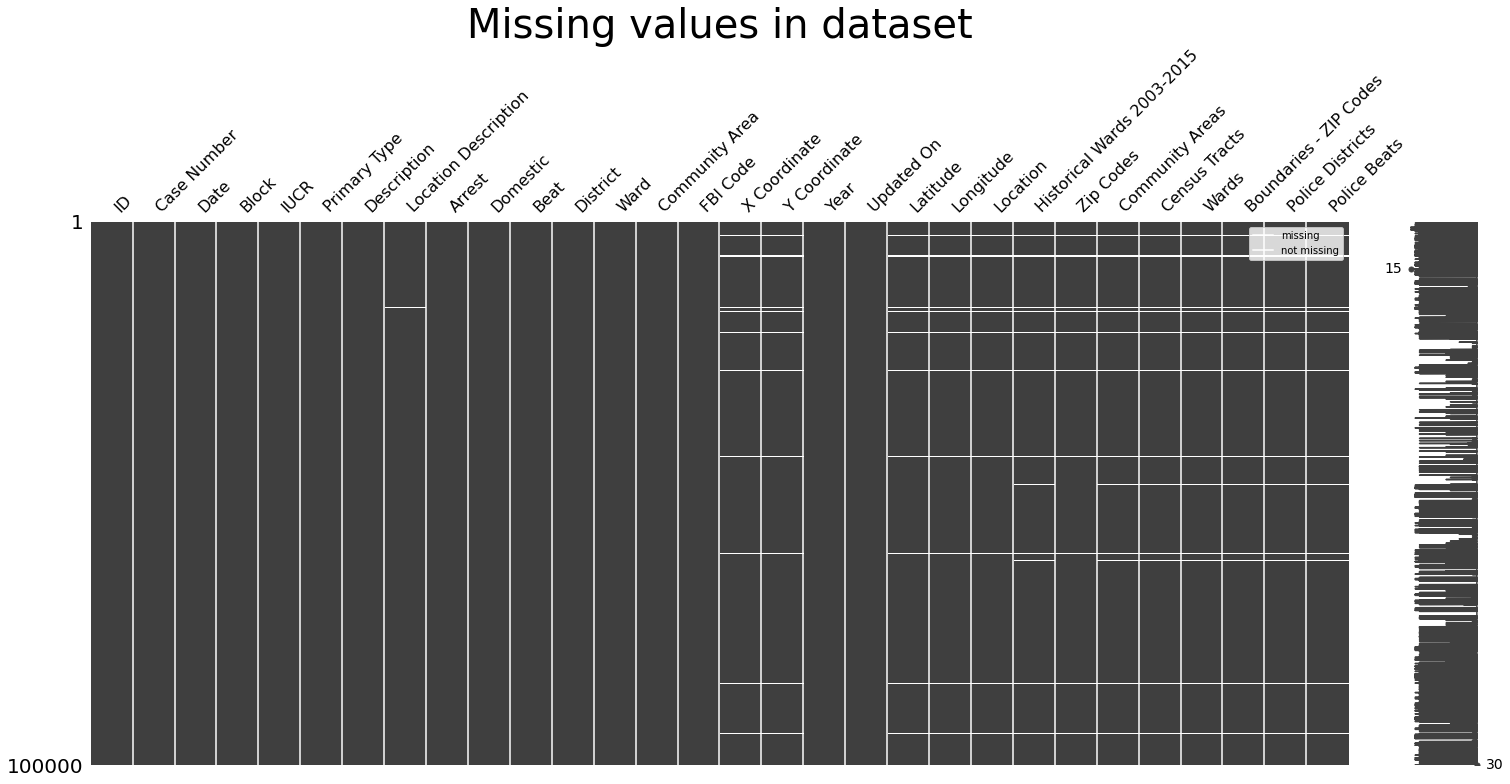

In [13]:
# Create a missingness matrix plot using the 'msno' library to visualize missing data patterns in the 'df' DataFrame
msno.matrix(df)

# Add a legend to the plot to indicate 'missing' and 'not missing' values
plt.legend(['missing', 'not missing'])

# Set the title of the plot to describe its purpose
plt.title("Missing values in dataset", size=40)


**Plotting graph for column of Data**

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Beat'}>,
        <AxesSubplot:title={'center':'District'}>,
        <AxesSubplot:title={'center':'Ward'}>],
       [<AxesSubplot:title={'center':'Community Area'}>,
        <AxesSubplot:title={'center':'X Coordinate'}>,
        <AxesSubplot:title={'center':'Y Coordinate'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Historical Wards 2003-2015'}>,
        <AxesSubplot:title={'center':'Zip Codes'}>],
       [<AxesSubplot:title={'center':'Community Areas'}>,
        <AxesSubplot:title={'center':'Census Tracts'}>,
        <AxesSubplot:title={'center':'Wards'}>,
        <AxesSubplot:title={'center':'Boundaries - ZIP Codes'}>],
       [<AxesSubplot:title={'center':'Police Districts'}>,
        <AxesSubplot:title={'center':'Police Beats'}>, <AxesSubplot:>,
        <Ax

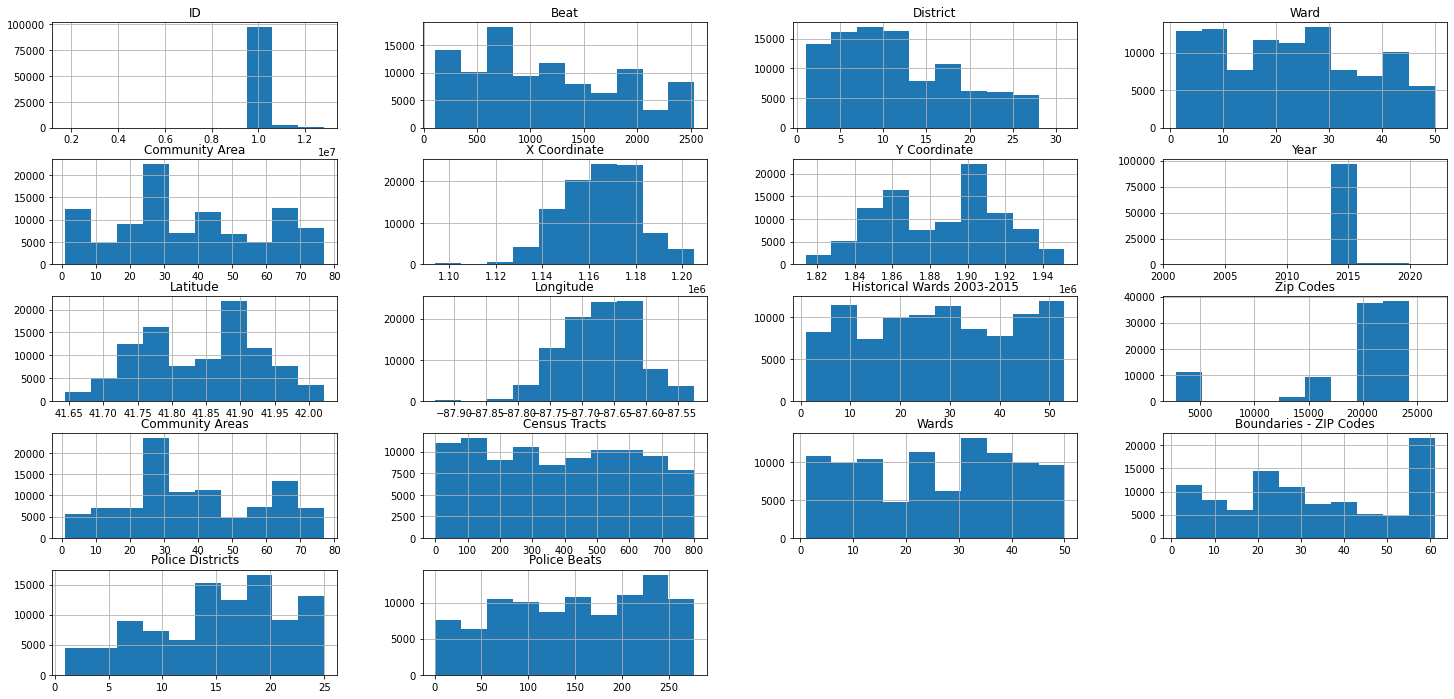

In [14]:
# Create a histogram for each numerical column in the 'df' DataFrame with a specified figure size
df.hist(figsize=(25,12))

**Cleaning the dataset**

* Here we are trying to optimise the data by filtering the columns which are required for our analysis

* we are trying to eleminate the columns that aren't needed in our data analysis to avoid data ovehead

In [15]:
# Create a new DataFrame 'df_filtered' by selecting specific columns of interest from the original 'df'
df_filter = df[['ID','Case Number','Date','Block','IUCR','Primary Type','Description',
                   'Location Description','Arrest','District','Ward','FBI Code','Year']]

In [16]:
df_filter

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,District,Ward,FBI Code,Year
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,9,12.0,08B,2015
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,15,29.0,06,2015
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,6,8.0,06,2018
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,14,35.0,18,2015
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,15,28.0,08A,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11223452,JA550814,12/15/2017 05:39:27 PM,073XX S UNIVERSITY AVE,2022,NARCOTICS,POSS: COCAINE,RESIDENCE,True,3,5.0,18,2017
99996,10215383,HY401570,08/29/2015 02:15:00 AM,0000X W ELM ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,18,42.0,06,2015
99997,10215384,HY401563,08/29/2015 02:10:00 AM,012XX W SUNNYSIDE AVE,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,19,46.0,03,2015
99998,10215385,HY392317,08/15/2015 12:00:00 AM,010XX W SCHOOL ST,0820,THEFT,$500 AND UNDER,SIDEWALK,False,19,44.0,06,2015


In [17]:
 # Display summary information about the 'df_filter' DataFrame, including data types, non-null counts, and memory usage
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    100000 non-null  int64  
 1   Case Number           100000 non-null  object 
 2   Date                  100000 non-null  object 
 3   Block                 100000 non-null  object 
 4   IUCR                  100000 non-null  object 
 5   Primary Type          100000 non-null  object 
 6   Description           100000 non-null  object 
 7   Location Description  99729 non-null   object 
 8   Arrest                100000 non-null  bool   
 9   District              100000 non-null  int64  
 10  Ward                  99996 non-null   float64
 11  FBI Code              100000 non-null  object 
 12  Year                  100000 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 9.3+ MB


**Changing the data types for the columns required for our analysis**

We are removing the null values in the rows

In [18]:
# Remove rows with missing (NaN) values in the 'Ward' column and update the 'df_filter' DataFrame
df_filter = df_filter.dropna(subset=['Ward'])

Converting the Data type to numericals to better process the data and predict the outcomes

In [19]:
# Convert the 'District' column in the 'df_filter' DataFrame to integer data type
df_filter["District"] = df_filter["District"].astype(int)

# Convert the 'Ward' column in the 'df_filter' DataFrame to integer data type
df_filter["Ward"] = df_filter["Ward"].astype(int)

# Convert the 'Date' column in the 'df_filter' DataFrame to datetime data type
df_filter["Date"] = df_filter["Date"].astype('datetime64[ns]')


C:\Users\pa1bo\AppData\Local\Temp\ipykernel_3420\1195238009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["District"] = df_filter["District"].astype(int)
C:\Users\pa1bo\AppData\Local\Temp\ipykernel_3420\1195238009.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["Ward"] = df_filter["Ward"].astype(int)
C:\Users\pa1bo\AppData\Local\Temp\ipykernel_3420\1195238009.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [20]:
# Randomly select and display 4 rows from the 'df_filter' DataFrame
df_filter.sample(4)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,District,Ward,FBI Code,Year
22386,10260995,HY448649,2015-10-03 22:19:00,055XX S KEDZIE AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,PARKING LOT/GARAGE(NON.RESID.),True,8,14,24,2015
38851,10288171,HY476450,2015-10-24 10:00:00,084XX S THROOP ST,1780,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE PORCH/HALLWAY,False,6,21,26,2015
93182,10203925,HY390849,2015-08-20 20:25:00,064XX S DR MARTIN LUTHER KING JR DR,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,False,3,20,04A,2015
53025,10312324,HY501121,2015-11-11 18:00:00,105XX S INDIANA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,5,9,08B,2015


In [21]:
# Calculate and display the count of missing (NaN) values for each column in the 'df_filter' DataFrame
df_filter.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    271
Arrest                    0
District                  0
Ward                      0
FBI Code                  0
Year                      0
dtype: int64

**Replacing the Null Values**

In [22]:
# Fill missing (NaN) values in the 'Location Description' column with the value "No Description" in the 'df_filter' DataFrame
df_filter['Location Description'].fillna("No Description", inplace=True)

C:\Users\pa1bo\AppData\Local\Temp\ipykernel_3420\566528959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Location Description'].fillna("No Description", inplace=True)


In [23]:
# Calculate and display the count of missing (NaN) values for each column in the 'df_filter' DataFrame 
#after filling missing values

df_filter.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
District                0
Ward                    0
FBI Code                0
Year                    0
dtype: int64

**Extracting day and month from date column**

In [24]:
# Extract the day of the week from the 'Date' column and create a new column 'day' in the 'df_filter' DataFrame
df_filter['day'] = df_filter['Date'].dt.day_name()

# Extract the month name from the 'Date' column and create a new column 'month' in the 'df_filter' DataFrame
df_filter['month'] = df_filter['Date'].dt.month_name()


C:\Users\pa1bo\AppData\Local\Temp\ipykernel_3420\1148521975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['day'] = df_filter['Date'].dt.day_name()
C:\Users\pa1bo\AppData\Local\Temp\ipykernel_3420\1148521975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['month'] = df_filter['Date'].dt.month_name()


**Visualization of Data**

Text(0.5, 1.0, 'Primary Type of Crimes')

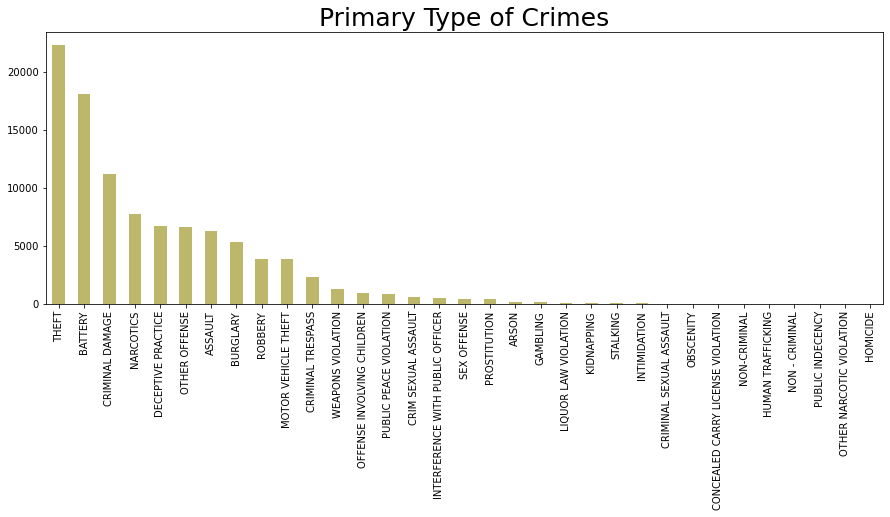

In [25]:
# Create a bar plot to visualize the count of each unique value in the 'Primary Type' column
df_filter["Primary Type"].value_counts().plot(kind="bar", figsize=(15, 5), color="darkkhaki")

# Set the title of the plot to describe the content being visualized
plt.title("Primary Type of Crimes", size=25)


### From the graph we got we can say that Most crimes are "THEFTS"

In [26]:
# Group the data in the 'df_filter' DataFrame by 'Primary Type' and calculate the size (count) of each group
crime_counts = df_filter.groupby('Primary Type').size().sort_values(ascending=False)

# Select the top 10 crime types with the highest counts
top_10_crimes = crime_counts.head(10)

# Print the counts of the top 10 crime types
print(top_10_crimes)


Primary Type
THEFT                  22301
BATTERY                18115
CRIMINAL DAMAGE        11167
NARCOTICS               7732
DECEPTIVE PRACTICE      6696
OTHER OFFENSE           6588
ASSAULT                 6272
BURGLARY                5348
ROBBERY                 3908
MOTOR VEHICLE THEFT     3859
dtype: int64


Listing Top 10 crimes out of all

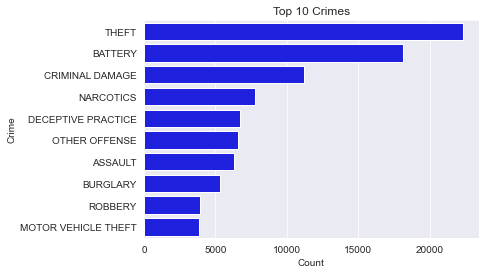

In [27]:
# Calculate the counts of the top 10 crime types in the 'Primary Type' column of the 'df_filter' DataFrame
crime_counts = df_filter['Primary Type'].value_counts().head(10)

# Set the seaborn style to 'darkgrid' for the plot
sns.set_style('darkgrid')

# Create a horizontal bar plot using seaborn to visualize the top 10 crimes and their counts
ax = sns.barplot(x=crime_counts.values, y=crime_counts.index, color='blue')

# Set the title of the plot
ax.set_title('Top 10 Crimes')

# Set labels for the x and y axes
ax.set_xlabel('Count')
ax.set_ylabel('Crime')

# Display the plot
plt.show()


In [28]:
# Calculate and display the top 10 most frequent crime descriptions in the 'Description' column of the 'df_filter' DataFrame
df_filter["Description"].value_counts().sort_values(ascending=False).head(10)

SIMPLE                          10033
$500 AND UNDER                   9387
DOMESTIC BATTERY SIMPLE          9019
TO VEHICLE                       5674
TO PROPERTY                      5046
OVER $500                        4989
FROM BUILDING                    3555
POSS: CANNABIS 30GMS OR LESS     3247
FORCIBLE ENTRY                   3237
RETAIL THEFT                     3218
Name: Description, dtype: int64

Text(0.5, 1.0, 'Crimes Description')

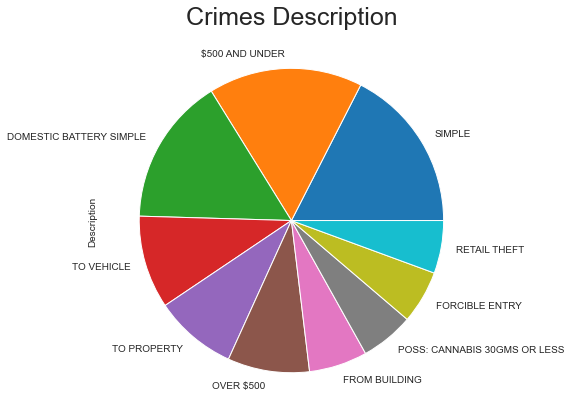

In [29]:
# Calculate the top 10 most frequent crime descriptions in the 'Description' column of the 'df_filter' DataFrame
top_10_descriptions = df_filter["Description"].value_counts().sort_values(ascending=False).head(10)

# Create a pie chart to visualize the distribution of the top 10 crime descriptions
top_10_descriptions.plot(kind="pie", figsize=(20, 7))

# Set the title of the pie chart
plt.title("Crimes Description", size=25)


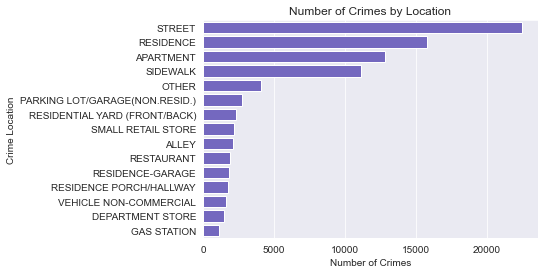

In [30]:
# Calculate the counts of the top 15 crime locations in the 'Location Description' column of the 'df_filter' DataFrame
crime_location_counts = df_filter['Location Description'].value_counts().head(15)

# Set the seaborn style to 'darkgrid' for the plot aesthetics
sns.set_style('darkgrid')

# Create a horizontal bar plot using seaborn to visualize the number of crimes by location
ax = sns.barplot(x=crime_location_counts.values, y=crime_location_counts.index, color='slateblue')

# Set the title of the plot
ax.set_title('Number of Crimes by Location')

# Set labels for the x and y axes
ax.set_xlabel('Number of Crimes')
ax.set_ylabel('Crime Location')

# Display the plot
plt.show()


#### We can see that most of the crimes occurs in streets as we can see from above graph that theft are simple domestic battery and the simple way they can get is with the street parked vehicles

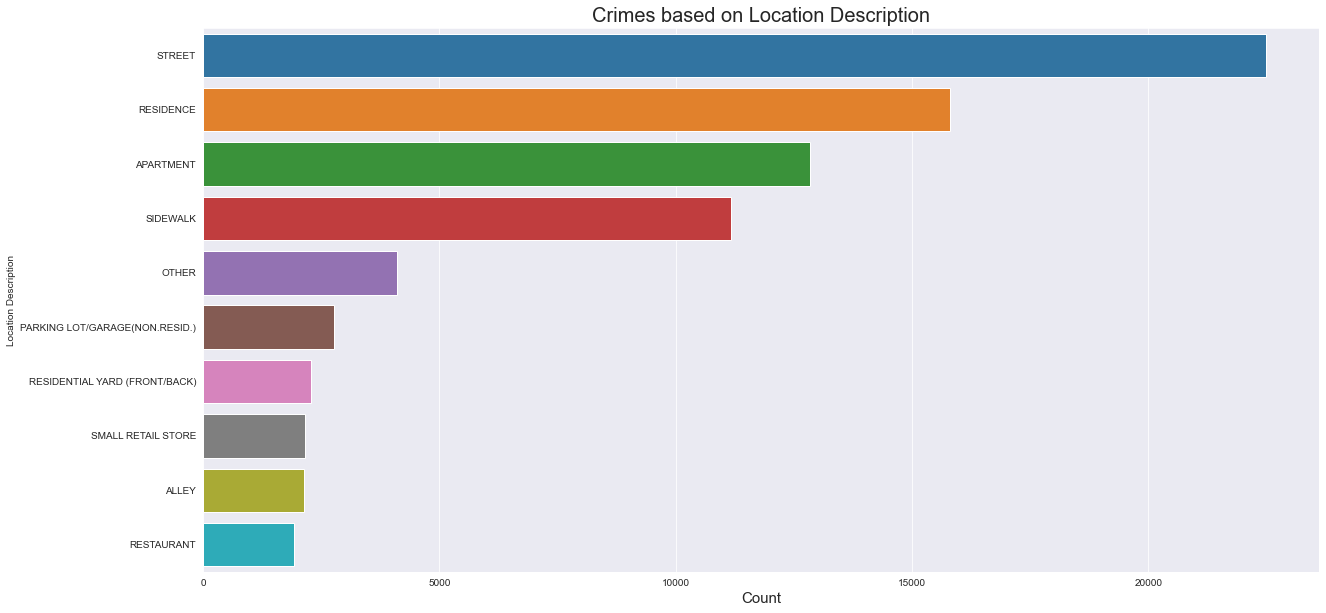

In [31]:
# Select the top 10 most common location descriptions for crimes from the 'Location Description' column
body = df_filter["Location Description"].value_counts().index[:10]

# Create a figure with a specified size for the countplot
plt.figure(figsize=(20, 10))

# Create a countplot using seaborn to visualize the distribution of crimes based on location description
sns.countplot(y=df_filter["Location Description"], order=body)

# Set the label for the x-axis
plt.xlabel("Count", size=15)

# Set the title of the plot
plt.title("Crimes based on Location Description", size=20)

# Display the plot
plt.show()


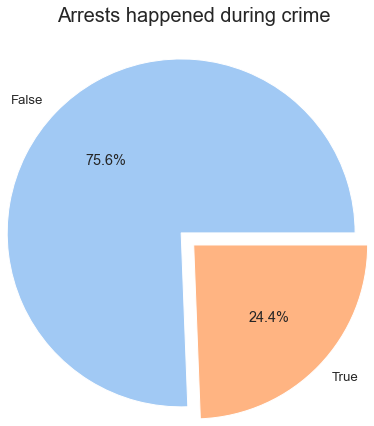

In [32]:
# Define the 'explode' list to create a wedge separation in the pie chart (0.2 means one of the wedges will be separated)
explode = [0.2, 0]

# Define a list of colors using a pastel color palette for the pie chart
colors = sns.color_palette("pastel")[0:5]

# Set the font scale for the plot using seaborn
sns.set(font_scale=1.2)

# Create a pie chart to visualize the distribution of arrests during crimes
# 'radius' sets the size of the pie chart, 'explode' separates one of the wedges, and 'autopct' displays percentage labels
df_filter['Arrest'].value_counts().plot(kind="pie", colors=colors, radius=2, explode=explode, autopct='%1.1f%%')

# Set the title of the pie chart with a custom position and size
plt.title("Arrests happened during crime", y=1.5, size=20)

# Display the pie chart
plt.show()


True represents the arrest and it is quite evident that there is very less arrest for the crimes that have been happening in chicago

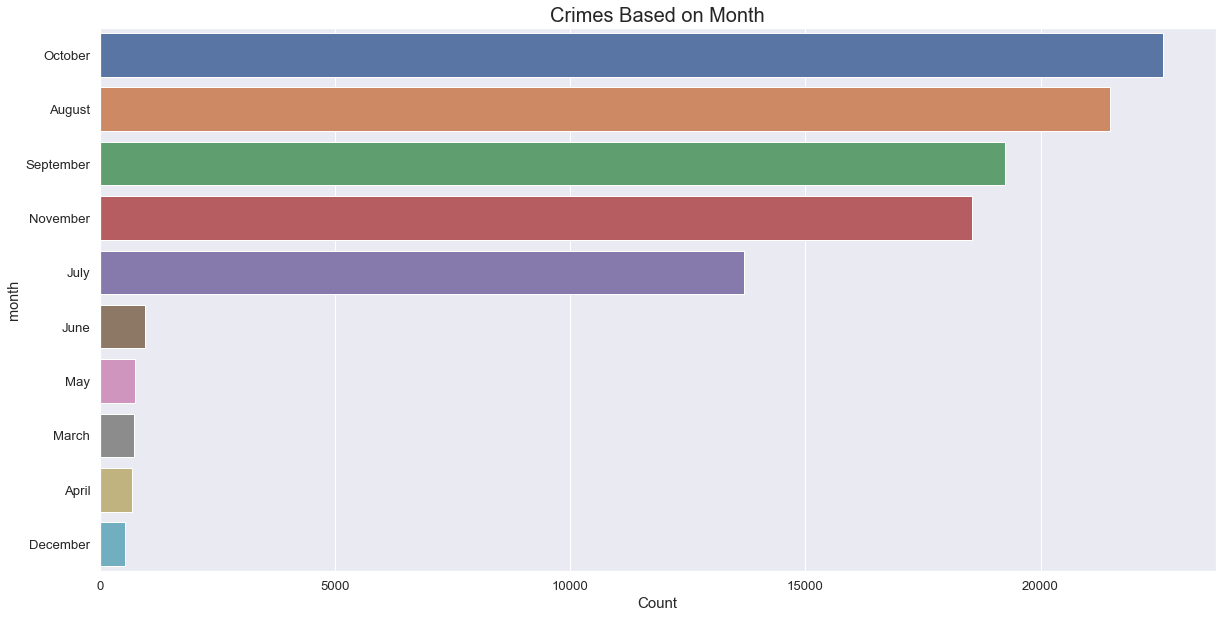

In [33]:
# Select the top 10 most common months for crimes from the 'month' column
mn = df_filter["month"].value_counts().index[:10]

# Create a figure with a specified size for the countplot
plt.figure(figsize=(20, 10))

# Create a countplot using seaborn to visualize the distribution of crimes based on months
sns.countplot(y=df_filter["month"], order=mn)

# Set the label for the x-axis
plt.xlabel("Count", size=15)

# Set the title of the plot
plt.title("Crimes Based on Month", size=20)

# Display the plot
plt.show()


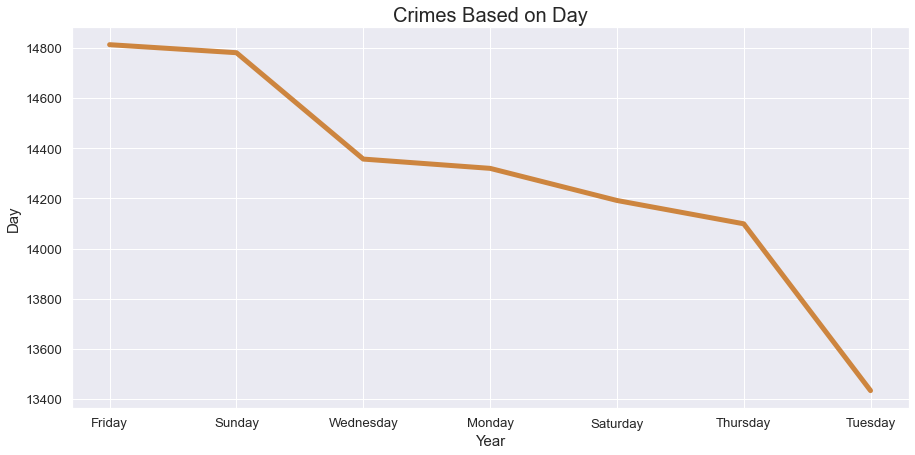

In [34]:
# Select the top 20 most common days for crimes from the 'day' column
dy = df_filter["day"].value_counts().index[:20]

# Create a line plot to visualize the distribution of crimes based on days
df_filter["day"].value_counts().plot(kind="line", figsize=(15, 7), linewidth=5, color="peru")

# Set the title of the plot
plt.title("Crimes Based on Day", size=20)

# Set labels for the x and y axes
plt.xlabel("Year", size=15)
plt.ylabel("Day", size=15)

# Display the plot
plt.show()


it seems like robbers do have to celebrate their weekends as we can see most of the crime happens on start of the weekend and end of the weekend

**Distribution of crimes by district codes**

C:\Users\pa1bo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


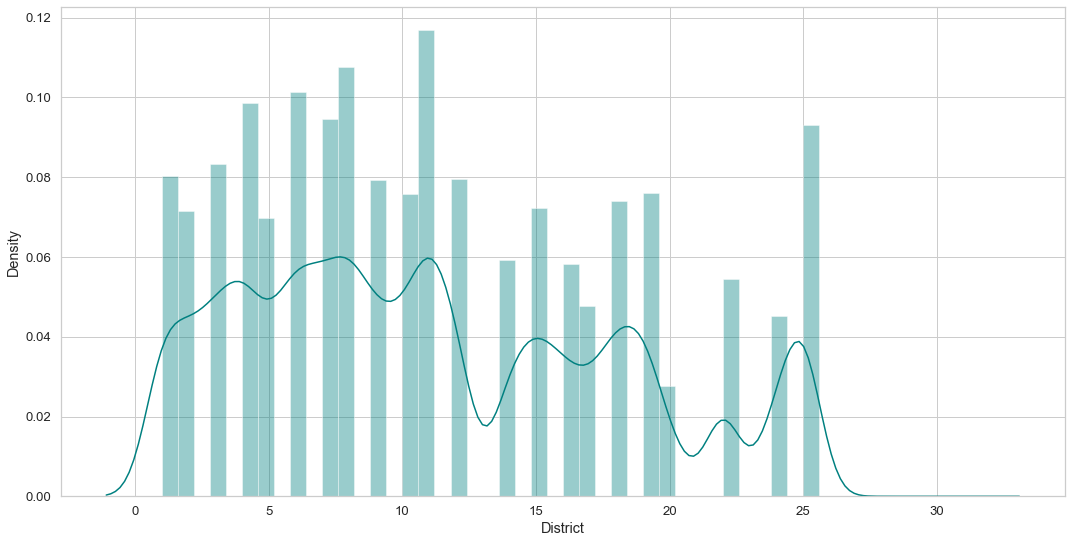

In [35]:
# Create a figure with a specified size for the distribution plot
plt.figure(figsize=(18, 9))

# Set the seaborn style to 'whitegrid' for the plot aesthetics
sns.set_style("whitegrid")

# Create a distribution plot (histogram and kernel density estimate) for the 'District' column
sns.distplot(df_filter["District"], color='teal')

# Display the plot
plt.show()


One-Tail T-Test Question

Question: "Is the rate of arrests for 'BURGLARY' higher in the winter months (December, January, February) compared to the rest of the year?"

Hypotheses:

Null Hypothesis (H0): The arrest rate for 'BURGLARY' during winter months is less than or equal to the rest of the year.

Alternative Hypothesis (H1): The arrest rate for 'BURGLARY' during winter months is higher than the rest of the year.

In [36]:
df_filter['Date'] = pd.to_datetime(df_filter['Date'])

# Filter data for 'BURGLARY'
burglary_data = df_filter[df_filter['Primary Type'] == 'BURGLARY']

# Extract month from the date and categorize as winter or not
# Winter months: December (12), January (1), February (2)
burglary_data['Is_Winter'] = burglary_data['Date'].dt.month.isin([12, 1, 2])

# Separate data into winter and non-winter groups
winter_burglary = burglary_data[burglary_data['Is_Winter']]['Arrest']
non_winter_burglary = burglary_data[~burglary_data['Is_Winter']]['Arrest']

# Perform a one-tail t-test
t_stat, p_val = stats.ttest_ind(winter_burglary, non_winter_burglary, equal_var=False)
p_val /= 2  # For one-tail test

# Output
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("There is sufficient evidence to reject the null hypothesis at the 0.05 level. This suggests that the arrest rate for 'BURGLARY' during winter months is significantly higher than in other months.")
else:
    print("There is not enough evidence to reject the null hypothesis at the 0.05 level. We cannot conclude that the arrest rate for 'BURGLARY' during winter months is higher than in other months.")




T-statistic: -17.543488854632248, P-value: 2.492893505857768e-67
There is sufficient evidence to reject the null hypothesis at the 0.05 level. This suggests that the arrest rate for 'BURGLARY' during winter months is significantly higher than in other months.


C:\Users\pa1bo\AppData\Local\Temp\ipykernel_3420\2333076509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Date'] = pd.to_datetime(df_filter['Date'])
C:\Users\pa1bo\AppData\Local\Temp\ipykernel_3420\2333076509.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burglary_data['Is_Winter'] = burglary_data['Date'].dt.month.isin([12, 1, 2])


Two-Tail T-Test Question

Question : "Is there a statistically significant difference in the arrest rates between theft and battery crimes?"

This question leads to the following hypotheses:

Null Hypothesis (H0): There is no difference in the arrest rates between theft and battery crimes.

Alternative Hypothesis (H1): There is a difference in the arrest rates between theft and battery crimes.

In [37]:
# Comparing arrest rates for two types of crimes, e.g., 'THEFT' and 'BATTERY'

# Filter data for 'THEFT' and 'BATTERY'
theft_data = df_filter[df_filter['Primary Type'] == 'THEFT']
battery_data = df_filter[df_filter['Primary Type'] == 'BATTERY']

# Perform a two-tail t-test on 'Arrest' column (assuming it's binary)
t_stat, p_val = stats.ttest_ind(theft_data['Arrest'], battery_data['Arrest'], equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("There is sufficient evidence to reject the null hypothesis at the 0.05 level. This suggests that There is  difference in the arrest rates between theft and battery crimes.")
else:
    print("There is not enough evidence to reject the null hypothesis at the 0.05 level. There is no difference in the arrest rates between theft and battery crimes. ")



T-statistic: -31.246596659213083, P-value: 3.1042459765790386e-211
There is sufficient evidence to reject the null hypothesis at the 0.05 level. This suggests that There is  difference in the arrest rates between theft and battery crimes.


 One-Tail Z-Score Hypothesis Test
 
Question: "Is the average arrest rate for narcotics-related crimes in 2020 higher than in previous years?"

Null hypothesis: The average arrest rate for narcotics-related crimes in 2020 is the same as the average arrest rate for narcotics-related crimes in previous years.

Alternate hypothesis: The average arrest rate for narcotics-related crimes in 2020 is higher than the average arrest rate for narcotics-related crimes in previous years.

In [38]:
# Filter for narcotics-related crimes
narcotics_data = df_filter[df_filter['Primary Type'] == 'NARCOTICS']

# Calculate city-wide average arrest rate for narcotics in 2020 and previous years
narcotics_2020 = narcotics_data[narcotics_data['Year'] == 2020]
narcotics_pre_2020 = narcotics_data[narcotics_data['Year'] < 2020]

# Calculate the arrest rates
arrest_rate_2020 = narcotics_2020['Arrest'].mean()
arrest_rate_pre_2020 = narcotics_pre_2020['Arrest'].mean()

# Calculate the Z-score
z_score = (arrest_rate_2020 - arrest_rate_pre_2020) / (narcotics_data['Arrest'].std() / np.sqrt(len(narcotics_2020)))

# Calculate the P-value for a one-tailed test
p_value = stats.norm.sf(z_score)  # sf is survival function, for one-tailed test

# Output
print(f"Z-score: {z_score}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is sufficient evidence to reject the null hypothesis. The average arrest rate for narcotics-related crimes in 2020 is significantly higher than in previous years.")
else:
    print("There is not enough evidence to reject the null hypothesis. We cannot conclude that the average arrest rate for narcotics-related crimes in 2020 is higher than in previous years.")


Z-score: 0.08832476618567715, P-value: 0.4648092776534195
There is not enough evidence to reject the null hypothesis. We cannot conclude that the average arrest rate for narcotics-related crimes in 2020 is higher than in previous years.


Two-Tail Z-Score Hypothesis Test 

Question:"Is there a significant difference in the arrest rate for robbery crimes between District 5 and the city-wide average?"

Null hypothesis: The arrest rate for robbery crimes in District 5 is not significantly different from the city-wide average.

Alternate hypothesis: The arrest rate for robbery crimes in District 5 is significantly different from the city-wide average.

In [39]:
# Filter for robbery crimes
robbery_data = df_filter[df_filter['Primary Type'] == 'ROBBERY']

# Calculate the city-wide average arrest rate for robbery
citywide_avg_arrest_rate = robbery_data['Arrest'].mean()

# Calculate the arrest rate for robbery in District 5
district_5_robbery = robbery_data[robbery_data['District'] == 5]
district_5_avg_arrest_rate = district_5_robbery['Arrest'].mean()

# Calculate the standard error of the mean
std_error = robbery_data['Arrest'].std() / np.sqrt(len(robbery_data))

# Calculate the Z-score
z_score = (district_5_avg_arrest_rate - citywide_avg_arrest_rate) / std_error

# Calculate the P-value for a two-tailed test
p_value = stats.norm.sf(abs(z_score)) * 2   # sf is survival function, times 2 for two-tailed test

# Output
print(f"Z-score: {z_score}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is sufficient evidence to reject the null hypothesis. The arrest rate for robbery crimes in District 5 is significantly different from the city-wide average.")
else:
    print("There is not enough evidence to reject the null hypothesis. We cannot conclude that the arrest rate for robbery crimes in District 5 is significantly different from the city-wide average.")


Z-score: -9.184742327733286, P-value: 4.1251373800396407e-20
There is sufficient evidence to reject the null hypothesis. The arrest rate for robbery crimes in District 5 is significantly different from the city-wide average.


# CONCLUSION

The visualizations in the notebook provide a vivid portrayal of crime patterns in Chicago, revealing critical insights into the
nature and distribution of criminal activities. Through these graphical representations, the analysis likely highlights key 
trends such as the prevalence of certain types of crimes, their concentration in specific geographic locations, and temporal 
variations. These visual aids are instrumental in making the complex data more accessible and understandable, thereby aiding 
in the identification of hotspots and time frames that are particularly susceptible to crime. Such visual analysis not only 
helps in comprehending the current state of criminal activities but also serves as a foundational tool for predictive policing 
strategies and community safety initiatives.

The hypothesis testing conducted in the notebook appears to provide substantial evidence on various aspects of crime in Chicago. Without delving into specific statistical values, the tests collectively suggest intriguing patterns: a significant variation in arrest rates across different types of crimes and seasons, as well as differences in crime rates between specific years and police districts. For instance, the findings indicate notable seasonal differences in burglary arrest rates and disparities in arrest rates between theft and battery crimes. Additionally, the analysis explores the change in narcotics-related arrest rates over a specific year and the variance in robbery arrest rates across police districts. These results offer a deeper understanding of the dynamics of crime and law enforcement effectiveness, facilitating data-driven decision-making for crime prevention and public safety enhancement.